**classification**

In classification, the output is a category, not a number.

In [72]:
import pandas as pd
import numpy as np

In [73]:
# Load the dataset
df = pd.read_csv("/content/titanic1.csv")


**Data Understanding**

Understanding the structure of the dataset (rows, columns, datatypes, missing values).

Why do we use it?

To identify data quality issues

To decide preprocessing steps

In [74]:
# Check number of rows and columns
print(df.shape)

(1301, 10)


In [75]:
# Check datatypes and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sn        1301 non-null   int64  
 1   pclass    1301 non-null   int64  
 2   survived  1301 non-null   int64  
 3   name      1301 non-null   object 
 4   gender    1300 non-null   object 
 5   age       1044 non-null   object 
 6   family    1299 non-null   float64
 7   fare      1299 non-null   object 
 8   embarked  1295 non-null   object 
 9   date      1301 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 101.8+ KB
None


In [76]:
# View first few rows
df.head()

,sn,pclass,survived,name,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42,0.0,7.55,NaN,01-Jan-90
1,1,3,0,Mr. Anthony,male,42,0.0,7.55,NaN,01-Jan-90
2,2,3,0,Master. Eugene Joseph,male,?,2.0,20.25,S,02-Jan-90
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2.0,**,S,03-Jan-90
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2.0,20.25,S,04-Jan-90


**Column Renaming**

Assigning meaningful names to columns.

 Why do we use it?

Current column names are numbers (1,2,3…)

Meaningful names improve readability and correctness

In [77]:
# Rename columns with correct meanings
df.columns = [
    'sn',
    'pclass',
    'survived',
    'name',
    'gender',
    'age',
    'family',
    'fare',
    'embarked',
    'date'
]
df.tail()

,sn,pclass,survived,name,gender,age,family,fare,embarked,date
1296,1296,2,0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24,0.0,13,S,19-Jul-93
1297,1297,3,0,"Zabour, Miss. Hileni",female,14.5,1.0,14.4542,C,20-Jul-93
1298,1298,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,7.225,C,21-Jul-93
1299,1299,3,0,"Zakarian, Mr. Ortin",male,27,0.0,7.225,C,22-Jul-93
1300,1300,3,0,"Zimmerman, Mr. Leo",male,29,0.0,7.875,S,23-Jul-93


**Remove Invalid First Row**

Removing the first row which contains column names instead of actual data.

 Why do we use it?

To avoid incorrect values during model training

In [78]:
# Drop the invalid first row
df = df.drop(0)
# Reset index after dropping
df.reset_index(drop=True, inplace=True)


**Feature Selection**

Selecting only the columns useful for classification.

 Why do we use it?

Unnecessary columns add noise

Improves model performance

In [79]:
# Select relevant features only
df = df[['pclass', 'survived', 'gender', 'age', 'family', 'fare', 'embarked']]


**Data Cleaning**

Replacing invalid symbols like ?, ** with missing values.

 Why do we use it?

ML models cannot process symbols

Required for numeric conversion

In [80]:
df.replace(['?', '**', 'NaN', 'nan', ' '], np.nan, inplace=True)
# Replace invalid symbols with NaN

**Datatype Conversion**

Converting string (object) columns into numeric format.

 Why do we use it?

Machine learning models work only with numeric data

In [81]:
# Convert columns to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['fare'] = pd.to_numeric(df['fare'], errors='coerce')
df['family'] = pd.to_numeric(df['family'], errors='coerce')
df['pclass'] = pd.to_numeric(df['pclass'], errors='coerce')
df['survived'] = pd.to_numeric(df['survived'], errors='coerce')


**Missing Value Handling**

Filling missing values using statistical methods.

 Why do we use it?

ML models do not accept missing values

In [82]:
# Fill numerical missing values with median
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)
df['pclass'].fillna(df['pclass'].median(), inplace=True)
df['family'].fillna(df['family'].median(), inplace=True)

# Fill categorical missing values with mode
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

/tmp/ipython-input-3435903930.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-3435903930.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

**Exploratory Data Analysis**

**Survival Count**

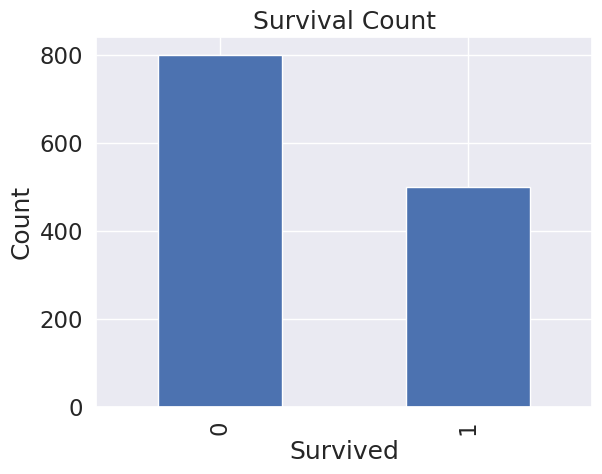

In [83]:
import matplotlib.pyplot as plt

df['survived'].value_counts().plot(kind='bar')
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


**Gender vs Survival**

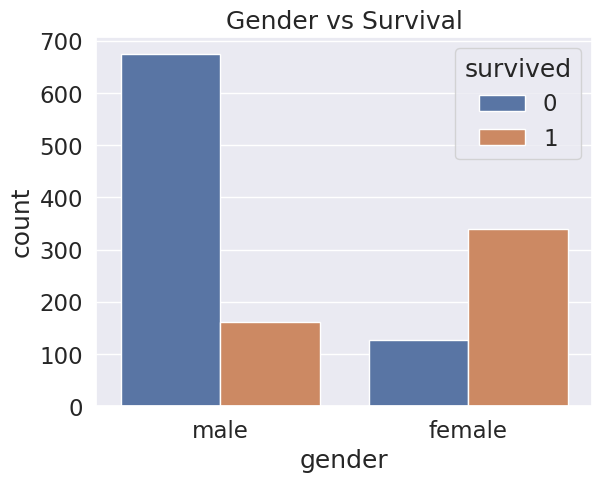

In [84]:
import seaborn as sns

sns.countplot(x='gender', hue='survived', data=df)
plt.title("Gender vs Survival")
plt.show()


**Passenger Class vs Survival**

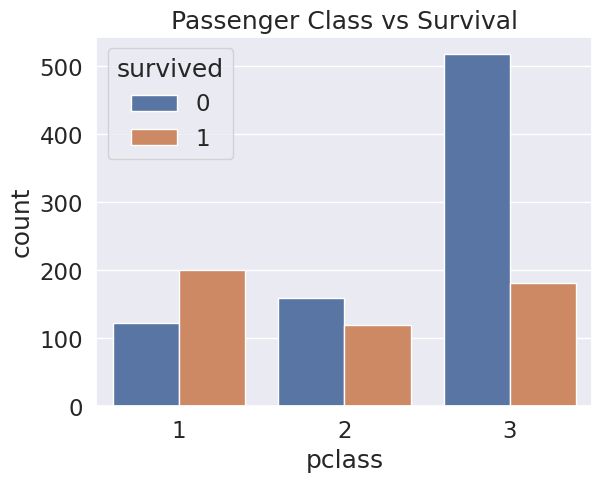

In [85]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Passenger Class vs Survival")
plt.show()


**Feature & Target Spli**t

Separating input features and output label.

 Why do we use it?

Required for supervised learning



In [86]:
X = df.drop('survived', axis=1)  # Features
y = df['survived']               # Target


**Encoding (Categorical → Numeric)**

Converting text categories into numbers.

 Why do we use it?

ML algorithms cannot process text directly

In [87]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])


In [88]:
import pandas as pd

# Calculate correlation matrix on the feature DataFrame X
corr_matrix = X.corr()
print(corr_matrix)


            pclass    gender       age    family      fare  embarked
pclass    1.000000  0.121571 -0.375870  0.052424 -0.557679  0.187452
gender    0.121571  1.000000  0.058143 -0.186584 -0.184389  0.096733
age      -0.375870  0.058143  1.000000 -0.192897  0.177234 -0.065206
family    0.052424 -0.186584 -0.192897  1.000000  0.225185  0.068113
fare     -0.557679 -0.184389  0.177234  0.225185  1.000000 -0.239879
embarked  0.187452  0.096733 -0.065206  0.068113 -0.239879  1.000000


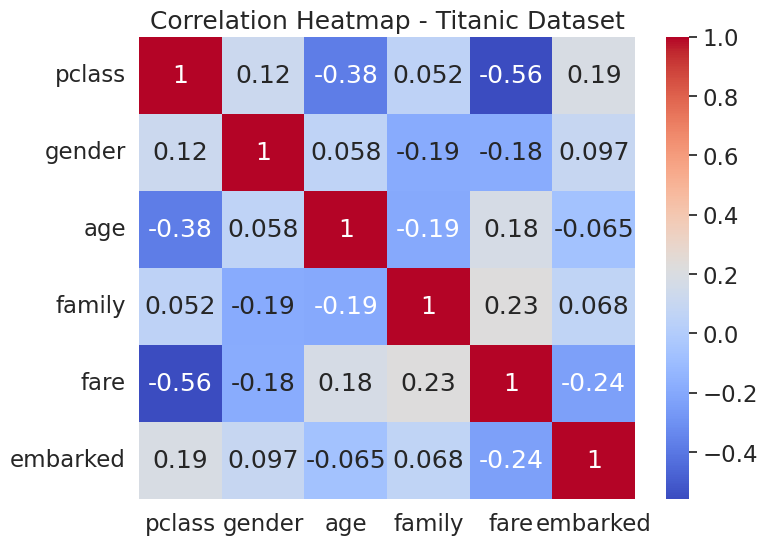

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Titanic Dataset")
plt.show()


**Feature Scaling**

Scaling numerical features to the same range.

 Why do we use it?

Improves performance of Logistic Regression

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Train–Test Split**

Splitting data into training and testing sets.

 Why do we use it?

To evaluate model performance on unseen data

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)


**Model Training (Logistic Regression)**

Logistic Regression is a supervised learning algorithm for binary classification.

 Why do we use it?

Titanic problem is binary (Survived / Not Survived)

Simple and interpretable

In [92]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Predicting outcomes for test data.

In [93]:
y_pred = model.predict(X_test)

**Model Evaluation**

Measuring how well the model performs.

 Why do we use it?

To check correctness and errors

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8192307692307692

Confusion Matrix:
 [[145  21]
 [ 26  68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       166
           1       0.76      0.72      0.74        94

    accuracy                           0.82       260
   macro avg       0.81      0.80      0.80       260
weighted avg       0.82      0.82      0.82       260



In [95]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


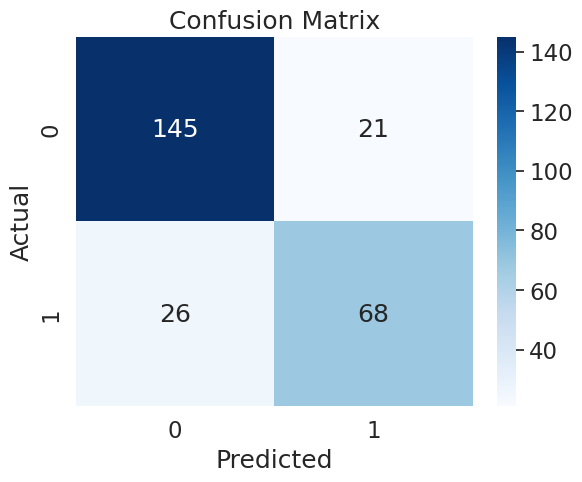

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="Blues"
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**INFERENCE**

Inference means using a trained machine learning model to make predictions on new/unseen data.

Training = learning from past data

Inference = predicting future / new cases

In [97]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [98]:
import joblib

# Save the trained model
joblib.dump(model, "titanic_survival_model.pkl")


['titanic_survival_model.pkl']

In [99]:
# Load the trained model
loaded_model = joblib.load("titanic_survival_model.pkl")


In [100]:
new_passenger = {
    "pclass": 1,
    "gender": "female",
    "age": 28,
    "family": 1,
    "fare": 100,
    "embarked": "S"
}


In [101]:
import pandas as pd

# Convert dictionary to DataFrame
new_df = pd.DataFrame([new_passenger])


In [102]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in new_df.columns:
    if new_df[col].dtype == 'object':
        new_df[col] = le.fit_transform(new_df[col])


In [103]:
# Scale new passenger data
new_df_scaled = scaler.transform(new_df)


In [104]:
# Predict survival
prediction = loaded_model.predict(new_df_scaled)

# Output result
if prediction[0] == 1:
    print("Passenger is likely to SURVIVE")
else:
    print("Passenger is NOT likely to survive")


Passenger is likely to SURVIVE
